In [1]:
import plotly.io as pio
pio.renderers.default = 'notebook'


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import iplot
import plotly.graph_objs as go
import plotly.express as px

import warnings
warnings.filterwarnings('ignore') 

In [4]:
path = '/home/physics/Downloads/archive(1)/student_lifestyle_dataset.csv'
df=pd.read_csv(path)
df.head()

,Student_ID,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA,Stress_Level
0,1,6.9,3.8,8.7,2.8,1.8,2.99,Moderate
1,2,5.3,3.5,8.0,4.2,3.0,2.75,Low
2,3,5.1,3.9,9.2,1.2,4.6,2.67,Low
3,4,6.5,2.1,7.2,1.7,6.5,2.88,Moderate
4,5,8.1,0.6,6.5,2.2,6.6,3.51,High


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Student_ID                       2000 non-null   int64  
 1   Study_Hours_Per_Day              2000 non-null   float64
 2   Extracurricular_Hours_Per_Day    2000 non-null   float64
 3   Sleep_Hours_Per_Day              2000 non-null   float64
 4   Social_Hours_Per_Day             2000 non-null   float64
 5   Physical_Activity_Hours_Per_Day  2000 non-null   float64
 6   GPA                              2000 non-null   float64
 7   Stress_Level                     2000 non-null   object 
dtypes: float64(6), int64(1), object(1)
memory usage: 125.1+ KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Student_ID,2000.0,1000.50000,577.494589,1.00,500.75,1000.50,1500.25,2000.0
Study_Hours_Per_Day,2000.0,7.47580,1.423888,5.00,6.30,7.40,8.70,10.0
Extracurricular_Hours_Per_Day,2000.0,1.99010,1.155855,0.00,1.00,2.00,3.00,4.0
Sleep_Hours_Per_Day,2000.0,7.50125,1.460949,5.00,6.20,7.50,8.80,10.0
Social_Hours_Per_Day,2000.0,2.70455,1.688514,0.00,1.20,2.60,4.10,6.0
Physical_Activity_Hours_Per_Day,2000.0,4.32830,2.514110,0.00,2.40,4.10,6.10,13.0
GPA,2000.0,3.11596,0.298674,2.24,2.90,3.11,3.33,4.0


In [8]:
df.Stress_Level.value_counts()

Stress_Level
High        1029
Moderate     674
Low          297
Name: count, dtype: int64

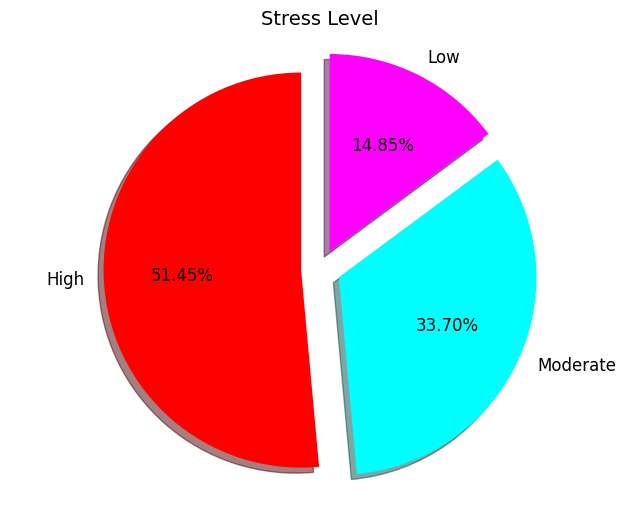

In [11]:
# Pie Chart
pie_list =df.Stress_Level.value_counts()
labels = df.Stress_Level.value_counts().index
fig, ax = plt.subplots(figsize=(8,6))
custom_colors = ['red', 'cyan', 'magenta']
ax.pie(pie_list, labels=labels, autopct='%1.2f%%', startangle=90,
       explode=[0.1, 0.1, 0.1], shadow = 0.1, textprops={'fontsize': 12} , colors=custom_colors)


ax.set_title('Stress Level', fontsize=14,color="Black")
ax.axis('equal')

plt.show()

# Correlation Matrix

In [19]:
data_corr=df.select_dtypes(["int","float"]).corr()

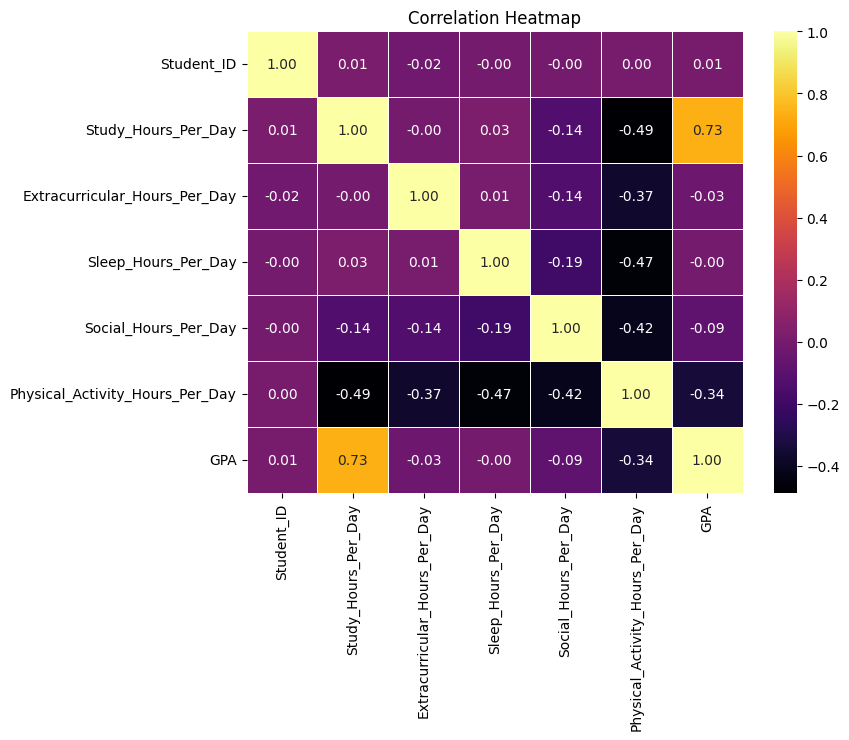

In [20]:
# Create a heatmap to visualize the correlation matrix.
plt.figure(figsize=(8,6))
sns.heatmap(data_corr, annot=True, cmap="inferno", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

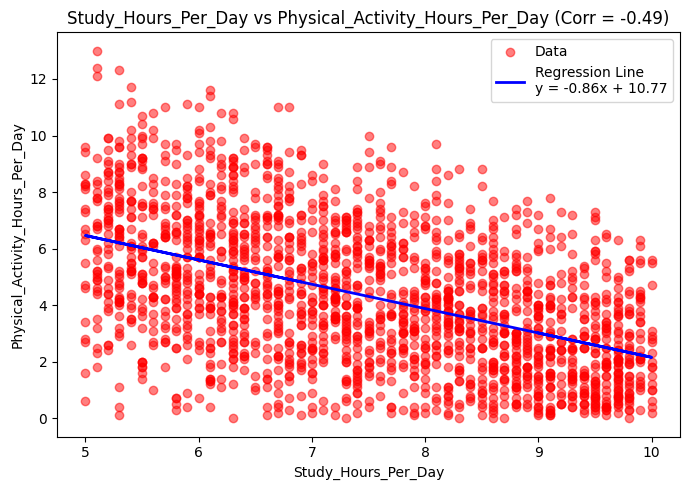

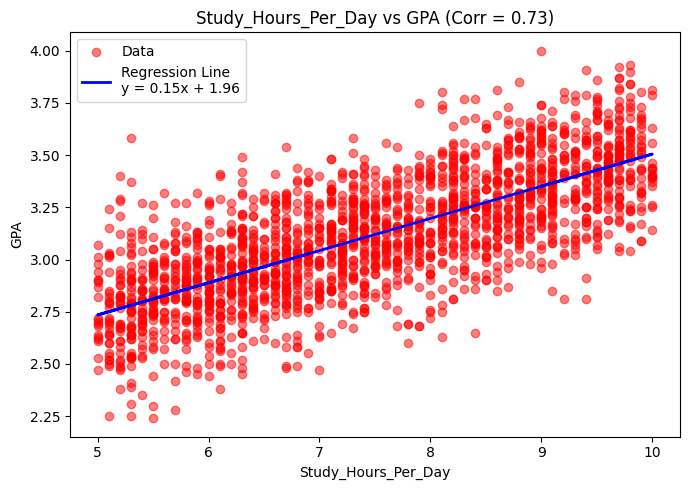

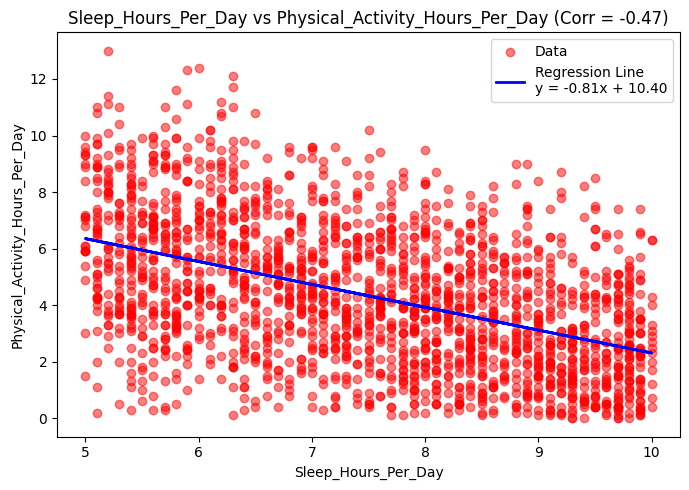

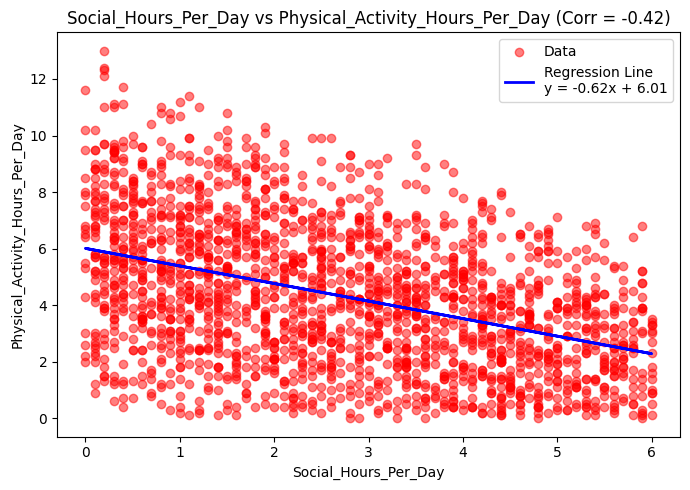

In [43]:
from sklearn.linear_model import LinearRegression

corr_matrix = data_corr

features = corr_matrix.columns.tolist()
plt.style.use('default')
# Looping through the pairs
for i in range(len(features)):
    for j in range(i + 1, len(features)):  
        f1 = features[i]
        f2 = features[j]
        corr_value = corr_matrix.loc[f1, f2]

        if abs(corr_value) > 0.4:
            x = df[[f1]].values  
            y = df[f2].values

            #the model fit
            model = LinearRegression()
            model.fit(x, y)
            y_pred = model.predict(x)
            
            slope = model.coef_[0]
            intercept = model.intercept_
            equation = f'y = {slope:.2f}x + {intercept:.2f}'

            plt.figure(figsize=(7, 5))
            plt.scatter(x, y, alpha=0.5, label='Data', color='red')
            plt.plot(x, y_pred, color='blue', linewidth=2, label=f'Regression Line\n{equation}')
            plt.xlabel(f1)
            plt.ylabel(f2)
            plt.title(f'{f1} vs {f2} (Corr = {corr_value:.2f})')
  

            plt.legend()
            plt.tight_layout()
            plt.show()




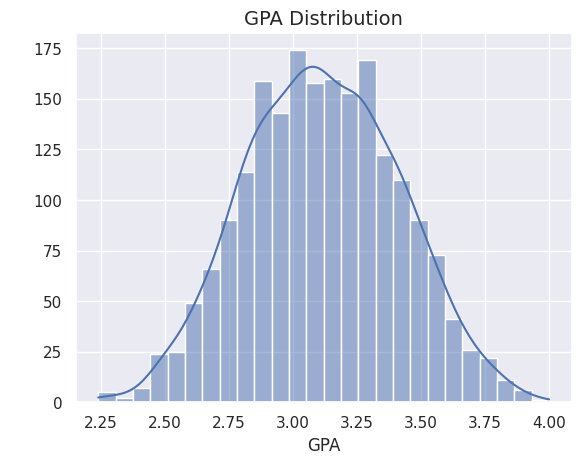

In [44]:
sns.set_theme(style="darkgrid")
sns.histplot(df.GPA,fill=True,kde=True)
plt.title("GPA Distribution",fontsize=14)
plt.xlabel("GPA")
plt.ylabel(" ")
plt.show()

In [27]:
# Group the data by "Stress_Level" and calculate the mean of "Sleep_Hours_Per_Day" for each stress level.
df.groupby("Stress_Level")[["Sleep_Hours_Per_Day"]].mean()

,Sleep_Hours_Per_Day
Stress_Level,
High,7.046453
Low,8.063973
Moderate,7.947626


In [29]:
# Group the data by "Stress_Level" and calculate the mean for each numerical column.
grouped_data = df.groupby('Stress_Level').mean()

# Create the first bar trace for average social hours per stress level.
trace1 = go.Bar(
    x=grouped_data.index,
    y=grouped_data['Social_Hours_Per_Day'],
    name="Average Social Hours",
    marker=dict(color='rgba(135, 206, 250, 0.7)'),
)

# Create the second bar trace for average physical activity hours per stress level.
trace2 = go.Bar(
    x=grouped_data.index,
    y=grouped_data['Physical_Activity_Hours_Per_Day'],
    name="Average Physical Activity Hours",
    marker=dict(color='rgba(255, 165, 0, 0.7)'), 
)

data = [trace1, trace2]
layout = go.Layout(
    barmode="group",
    title="Average Social and Physical Activity Hours by Stress Level",
    xaxis=dict(title="Stress Levels"),
    yaxis=dict(title="Average Hours Per Day"),
)

fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [30]:
# Create a pivot table to calculate the mean of study hours grouped by stress levels.
new_pivot = df.pivot_table(
    index="Stress_Level",              
    values="Study_Hours_Per_Day",     
    aggfunc="mean"                    
)
new_pivot

,Study_Hours_Per_Day
Stress_Level,
High,8.385034
Low,5.474411
Moderate,6.969585


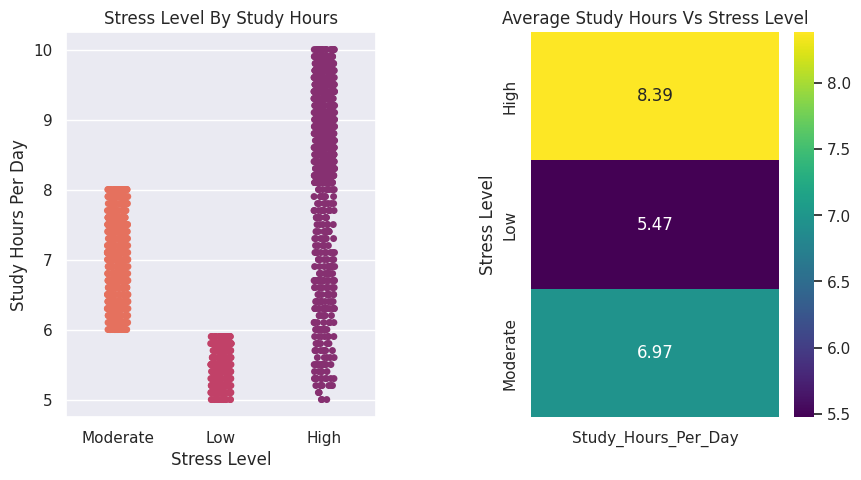

In [33]:
fig,axes=plt.subplots(1,2,figsize=(10,5), gridspec_kw={'wspace': 0.5})

# Create a strip plot to visualize the distribution of study hours per stress level.
sns.stripplot(x='Stress_Level', y='Study_Hours_Per_Day', data=df,palette="flare",ax=axes[0])
axes[0].set_title("Stress Level By Study Hours")
axes[0].set_xlabel("Stress Level")
axes[0].set_ylabel("Study Hours Per Day")

sns.heatmap(new_pivot, annot=True, cmap='viridis', cbar=True, fmt='.2f',ax=axes[1])
axes[1].set_title('Average Study Hours Vs Stress Level')
axes[1].set_xlabel(' ')
axes[1].set_ylabel('Stress Level')

plt.tight_layout()
plt.show()

In [35]:

Activity_Hours=round(df[['Social_Hours_Per_Day', 'Physical_Activity_Hours_Per_Day', 'Extracurricular_Hours_Per_Day','Study_Hours_Per_Day']].mean(),2)
Activity_Hours

Social_Hours_Per_Day               2.70
Physical_Activity_Hours_Per_Day    4.33
Extracurricular_Hours_Per_Day      1.99
Study_Hours_Per_Day                7.48
dtype: float64

In [37]:
from plotly.offline import iplot

fig = {
  "data": [
    {
      "values": Activity_Hours,
      "labels": Activity_Hours.index,
      "domain": {"x": [0, .5]},  
      "name": "Average Activity Hours",
      "hoverinfo": "label+value+name",
      "hole": .3,
      "type": "pie",
      "marker": {
          "colors": ['cyan', 'red', 'green', 'pink']
      }
    },
  ],
  "layout": {
        "title": "Average Activity Hours",
        "annotations": [
            { 
              "font": { "size": 20 },
              "showarrow": False,
              "text": " ",  
              "x": 0.20,
              "y": 1
            },
        ],
        "legend": {
            "x": 0.6,  
            "y": 0.5,  
            "font": {"size": 12}
        },
        "margin": {
            "l": 10, 
            "r": 10,  
            "t": 50,  
            "b": 50  
        }
    }
}

iplot(fig)
